### Algorithm
We can now use these partial derivatives to write the algorithm. Note that the learning rate lr, the initial a, b values and the number of iterations n_steps depend on the dataset. For this reason, we don’t assign them to specific values in the code below.

#### Numpy implementation

In the last unit, we derived the gradient descent algorithm and implemented it with Numpy. We will now test our implementation on the bike sharing dataset. You can download it from the resource section.

#### Monitor the loss value
Let’s start by loading the dataset.

In [1]:
import pandas as pd
import numpy as np
# Load the data
data_df = pd.read_csv("c3_bike-sharing.csv")
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


Our goal is to fit a simple linear regression model to this data using gradient descent. If our implementation is correct, we should obtain the following result.



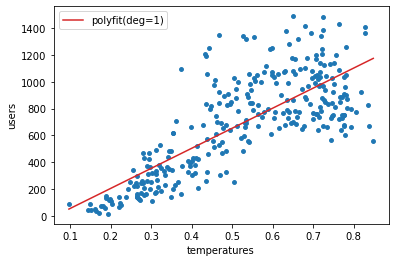

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Linear regression using polyfit
x = data_df.temp.values
y = data_df.users.values
coefs = np.polyfit(x, y, deg=1)

# Plot prediction curve
x_values = np.linspace(x.min(), x.max(), num=100)
y_values = np.polyval(coefs, x_values)
plt.scatter(x, y, s=15)
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)")
plt.xlabel("temperatures")
plt.ylabel("users")
plt.legend()
plt.show()

Let’s implement the algorithm using the code from the previous unit. This time, we will track the value of the root mean squared error (RMSE) function at each iteration. If our implementation is correct, this value should decrease after each step.

In [3]:
# Root mean squared error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [4]:
# Initialization
lr = 0.7  # learning rate
a, b = 0, 0
n_steps = 30

We added a line in the for loop to compute and save the RMSE value in a log_rmse variable.

In [5]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

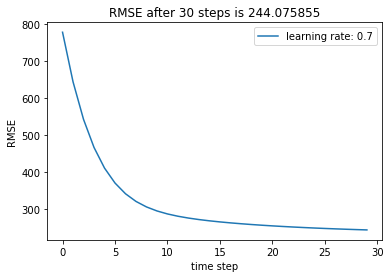

In [6]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

We can see that the error decreases after each step. The final value is around 244. We can now verify that the a, b values are optimal by computing the ordinary least squares (OLS) solution. To achieve this, we can use the Numpy polyfit() function.

In [7]:
a_polyfit, b_polyfit = np.polyfit(x, y, 1)

# Optimal parameters vs. ones obtained with GD
print("Polyfit (a, b)=          ({:.2f}, {:.2f})".format(a_polyfit, b_polyfit))
print("Gradient descent (a, b)= ({:.2f}, {:.2f})".format(a, b))


Polyfit (a, b)=          (1495.60, -94.61)
Gradient descent (a, b)= (1133.56, 98.91)


We can see that the values are far from the optimal ones. The slope is 1133.56 instead of 1495.6, and the intercept term is 98.91 instead of -94.61.

Let’s try to increase the number of steps to 400 instead of 30.



In [8]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400  # increase to 400

# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

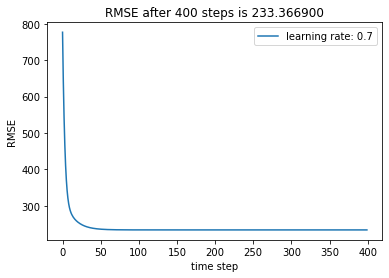

In [9]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [10]:
# New comparison
a_polyfit, b_polyfit = np.polyfit(x, y, 1)

# Optimal parameters vs. ones obtained with GD
print("Polyfit (a, b)=          ({:.2f}, {:.2f})".format(a_polyfit, b_polyfit))
print("Gradient descent (a, b)= ({:.2f}, {:.2f})".format(a, b))

Polyfit (a, b)=          (1495.60, -94.61)
Gradient descent (a, b)= (1495.60, -94.61)


#### Convergence
The algorithm doesn’t always converge to the optimal solution. For instance, if you increase the learning rate to 0.8, you should see that the error increases after each step and becomes very large.

In [11]:
# Initialization
lr = 0.8
a, b = 0, 0
n_steps = 400

In [12]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

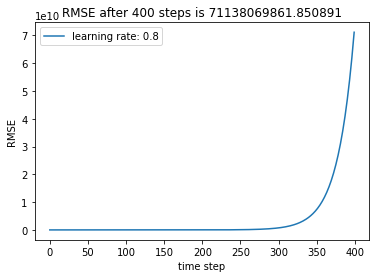

In [13]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In this case, we say that the algorithm diverges. But we will learn more about that in the next unit.

#### Stochastic and mini-batch variants
In the code from above, we computed the gradient using all the data points.

In [14]:
# Predictions with the current a,b values
y_pred = a * x + b

# Compute the error vector
error = y - y_pred

# Partial derivative with respect to a
a_grad = -2 * np.mean(x * error)

# Partial derivative with respect to b
b_grad = -2 * np.mean(error)

# Print shape
print("y_pred:", y_pred.shape)
print("error:", error.shape)
print("a_grad:", a_grad.shape)
print("b grad:", b_grad.shape)

y_pred: (302,)
error: (302,)
a_grad: ()
b grad: ()


As you can see, the y_pred, error vectors are arrays with n=302 elements, and we compute the two partial derivates using these 302 data points. In practice, we often calculate the gradient on a subset of the data points. We can distinguish three variants of the gradient descent algorithm.

* Batch gradient descent - computes the gradient using all data points.
* Mini-batch gradient descent - uses a mini-batch of data to compute gradients, e.g. 64, 128, 256 data points.
* Stochastic gradient descent - uses a single data point to compute the gradient.

Mini-batch and stochastic gradient descent are often used in practice because they scale well to large datasets, e.g., with millions of samples. For instance, the SGDRegressor object from Scikit-learn implements the stochastic variant. Note that we usually select the points at random in these two cases.

#### Issue with the gradient

In the last unit, we used gradient descent to fit a simple linear regression model to the bike sharing dataset. We will now do a simple experiment and see that the algorithm is sensitive to the scale of the data.

In [15]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_bike-sharing.csv")
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


We saw in a previous unit that these temperatures are not in degrees Celsius or Fahrenheit. In fact, the temp values were computed using the formula temp=(temp_C+8)/47 where temp_C is the original temperatures measured in degree Celsius.

Let’s do a simple experiment. Instead of applying gradient descent with these rescaled temperatures, let’s use the original values in degree Celsius. To compute them, we can simply reverse to formula from above.

In [16]:
# Create x/y arrays
x = 47 * data_df.temp.values - 8  # Degrees Celsius
y = data_df.users.values

Intuitively, rescaling a variable shouldn’t affect the algorithm since we provide the same information. Here is a comparison of the two datasets.

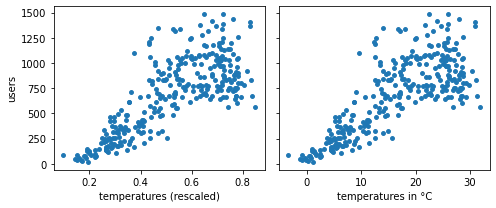

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Compare the two version
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 3))
ax1.scatter(data_df.temp, y, s=15)
ax1.set_xlabel("temperatures (rescaled)")
ax1.set_ylabel("users")
ax2.scatter(x, y, s=15)
ax2.set_xlabel("temperatures in °C")
plt.tight_layout()
plt.show()

Now, let’s run the gradient descent algorithm with these x, y values. Here is the code from the previous unit.



In [18]:
import numpy as np

# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Root mean square error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))


# Gradient descent
log_rmse = []
for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log RMSE score
    log_rmse.append(rmse(y, y_pred))

C:\Users\56975\anaconda3\envs\adsml\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\56975\AppData\Local\Temp/ipykernel_123352/1333192532.py:10: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.mean(np.square(y - y_pred)))
C:\Users\56975\AppData\Local\Temp/ipykernel_123352/1333192532.py:19: RuntimeWarning: overflow encountered in multiply
  a_grad = -2 * np.mean(x * error)
C:\Users\56975\AppData\Local\Temp/ipykernel_123352/1333192532.py:17: RuntimeWarning: invalid value encountered in add
  y_pred = a * x + b


If you run the code, you should get a RuntimeWarning which says that an overflow happened. This simply means that one instruction led to a number too large to be stored in the computer memory. It’s likely that gradient descent diverged. Let’s verify that by plotting the log_rmse variable.

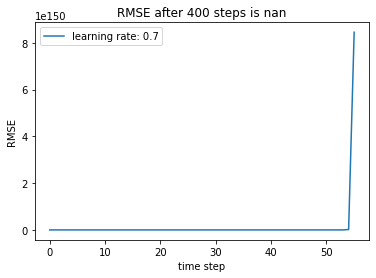

In [19]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

We can see that the RMSE error increases exponentially and that the algorithm diverged. Also, if you print the final value log_rmse[-1], you should get a nan value which represents the result of a numerical operation that didn’t succeed.

Let’s try to understand why the algorithm diverged with the temperatures in degrees Celsius. The idea is to visualize how the a, b values change after each iteration of the algorithm.

To achieve this, we will use the rescaled temperatures between zero and one.



In [20]:
# Create x/y arrays
x = data_df.temp.values
y = data_df.users.values

Let’s run the algorithm and save the a, b values after each step in a log_a and a log_b variable.

In [21]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

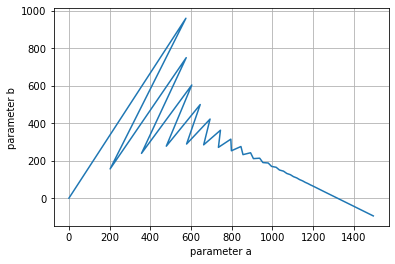

In [22]:
# Visualize steps
plt.plot(log_a, log_b)
plt.grid()
plt.xlabel("parameter a")
plt.ylabel("parameter b")
plt.show()

As you can see, gradient descent takes a zigzag path to the optimal solution. To understand why it takes this path, we can plot the error surface. The idea is to evaluate the loss value for each (a,b) point in the plot from above. Plotting the error surface is not straightforward. For this reason, we provide a visualize_steps() function in the annex below. The function expects four parameters.

* log_a, log_b - two lists that contain the a, b values at each iteration of the algorithm
* x, y - the input and target values

In [23]:
# Plot the error surface
def visualize_steps(fig, axis, log_a, log_b, x, y):
    # Define a grid of a,b parameters
    min_ab = min(min(log_a), min(log_b))
    max_ab = max(max(log_a), max(log_b))

    d = max_ab - min_ab
    min_ab -= d * 0.1
    max_ab += d * 0.1

    a = np.linspace(min_ab, max_ab, num=40)
    b = np.linspace(min_ab, max_ab, num=40)
    a_grid, b_grid = np.meshgrid(a, b)

    # Compute the RMSE score for each a,b pair on that grid
    rmse_grid = np.zeros_like(a_grid)

    for i in range(40):
        for j in range(40):
            a, b = a_grid[i, j], b_grid[i, j]
            rmse_grid[i, j] = rmse(a * x + b, y)

    # RMSE surface
    axis.set_aspect("equal", adjustable="box")
    mpl_contourset = axis.contourf(a_grid, b_grid, rmse_grid, 20, cmap=plt.cm.coolwarm)
    fig.colorbar(mpl_contourset, ax=axis, label="RMSE")

    # Plot the GD steps
    axis.plot(log_a, log_b, c="#00abe9")
    axis.scatter(log_a, log_b, c="#00abe9")

    # Set titles and labels
    axis.set_xlabel("parameter a")
    axis.set_ylabel("parameter b")

    axis.set_xlim(min_ab, max_ab)
    axis.set_ylim(min_ab, max_ab)

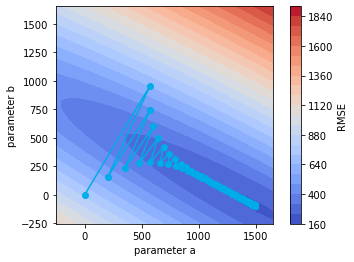

In [24]:
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x, y)

As you can see, gradient descent is jumping from one side of the “cost function valley” to the other and converges slowly to the optimal solution in dark blue. Also, it seems that the algorithm is taking unnecessarily large steps in the direction of the b parameter.

We know from the last units that gradient descent is following the opposite direction of the gradient. In our example, the algorithm is taking this suboptimal path because this direction is far from being the direction of the optimal value. In other words, there seems to be a problem with the gradient.

#### Issue with the gradient
We can see in the plot from above that the error surface is elongated and has elliptical level curves. For this reason, the opposite direction of the gradient doesn’t point toward the optimal solution. Here is an illustration of the issue.

As you can see, the direction of the steepest descent (the red arrows) given by the gradient doesn’t point toward the optimal value when the level curves are not circular. In this case, gradient descent is more likely to diverge.

This is exactly what happened with the temperatures in degrees Celsius. The error surface is a “steep valley” with gradient values nearly perpendicular to the direction of the optimal solution. Hence, the algorithm simply “jumps” above the valley and gets further away from it after each step.

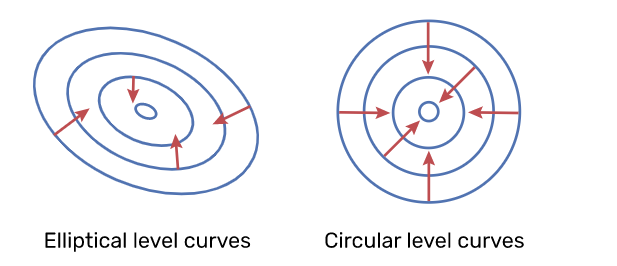

In [25]:
from IPython.display import Image
Image(filename="gradient.png")

### Standardization
In the unit about outliers, we saw that we can remove outliers by computing the standard scores or z-scores.

In [26]:
from sklearn.preprocessing import scale

# Standardize x
x_standardized = scale(x)

print("Mean:", x_standardized.mean())
print("Standard deviation:", x_standardized.std())

Mean: -7.058371547285764e-17
Standard deviation: 1.0


In [33]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x_standardized + b
    error = y - y_pred
    a_grad = -2 * np.mean(x_standardized * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

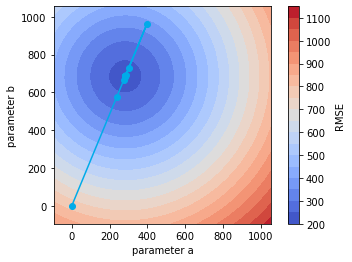

In [34]:
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x_standardized, y)

As we can see, the level curves are now perfectly circular and that the algorithm goes in the direction of the optimal solution. However, it seems that the algorithm overshoots the optimal solution. We can counteract this behavior by decreasing the learning rate.

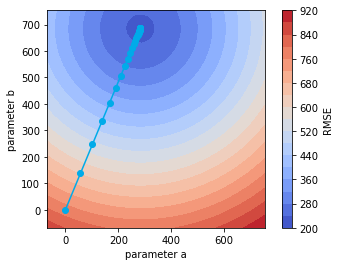

In [29]:
# Initialization
lr = 0.1
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x_standardized + b
    error = y - y_pred
    a_grad = -2 * np.mean(x_standardized * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)
    
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x_standardized, y)

* We should always apply standardization before running gradient descent.
* Standardized features have a mean of zero and a standard deviation of one.
* Gradient descent is faster to converge when features are standardized.